### Data Visualization with Seaborn
##### Seaborn is a fantastic and easy to use Python Visualization which is built on Matplotlib. For a quick look,
###### check out the gallery page.
To be covered:
##### 1. Relational Plots: Scatter plots
Line plots
##### 2. Distribution Plots:
Plotting Histograms with displot() 
and histplot() 
- Plotting Bivariate Data with Jointplot()
- Plotting Many Distribution with pairplot() 
- Plotting Distributions with rugplot()
Kernel Density Estimation (KDE) Plot with kdeplot() and displot()
Cumulative Distributions 
##### 3. Categorical Plots:
Categorical estimate plots Categorical distribution
Categorical distribution plots Categorical scatter plots
Plotting multiple categorical plots
###### 4. Regression Plots
###### 5. Multiplots:
Facet grids Pair grids Pair plots
###### 6. Matrix Plots: Heat and Cluster Maps
Heat maps
Cluster maps 
###### 7. Style and Color
Styles and themes Colors

### In this lab, we will use real world datasets, which are already part of Seaborn.


### 1. Relational Plots
##### These kind of plots are used to analyze the relationship between features.
#### -Scatter Plots 
#### -Line Plots


#### Imports

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
 # Loading the datasets to be used in this lab
titanic = sns.load_dataset('titanic') 
fmri = sns.load_dataset('fmri')
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
fmri.head(3)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033


In [5]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [6]:
flights.head(3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


### Scatter Plots

#### In order to visualize the relationship between between two numeric features,scatter plot can be a go to plot over other types.

we will use `sns.scatterplot('data,x,y,hue,style,palette,size,sizes,legend,markers')and also 'sns.replot'

<AxesSubplot:xlabel='age', ylabel='fare'>

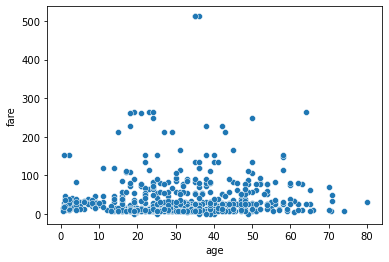

In [7]:
sns.scatterplot(data=titanic, x='age', y='fare')

###### With hue parameter, we can map another feature to the plot.

<AxesSubplot:xlabel='age', ylabel='fare'>

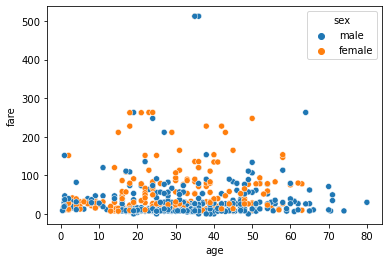

In [8]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex')

###### You can see it makes the plots more clear. In terms of this titanic dataset, you can directly identify that women paid high fare than men. 
##### To also highlight the difference between the hue classes , we can add marker style as follows.

<AxesSubplot:xlabel='age', ylabel='fare'>

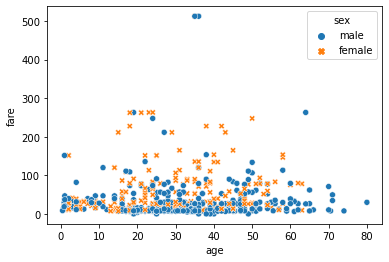

In [9]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex', style='sex')


#### Increasing the figure size...

<AxesSubplot:xlabel='age', ylabel='fare'>

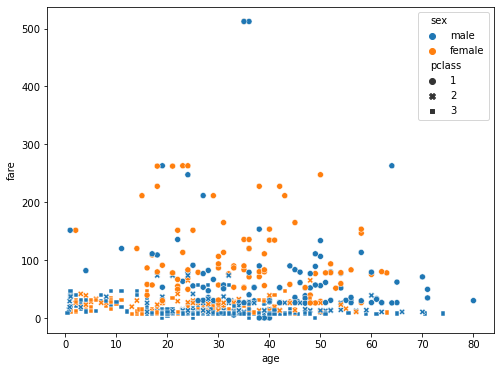

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex', style='pclass')

##### You can also use specific markers with style and markers paremeters.

<AxesSubplot:xlabel='age', ylabel='fare'>

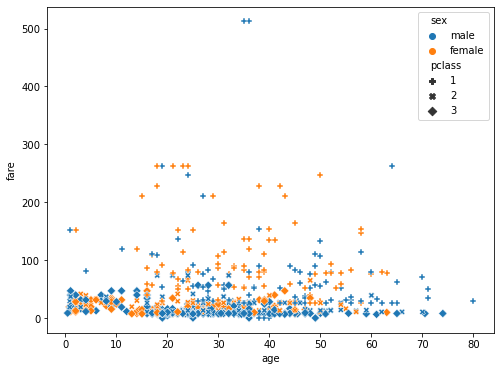

In [11]:
plt.figure(figsize=(8,6))
markers = {1:'P', 2:'X', 3:'D'} # P, X, and D are markers
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex', style='pclass', markers=markers)

Adding same feature on hue to size will make the plot more meaninfgul. sizes will control the range of marker areas of size . 


<AxesSubplot:xlabel='age', ylabel='fare'>

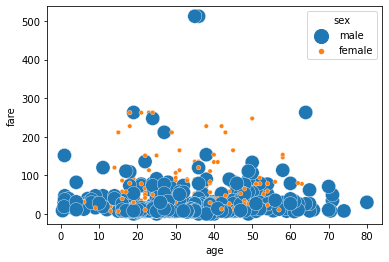

In [12]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex', size='sex', sizes=(20,200))


<AxesSubplot:xlabel='age', ylabel='fare'>

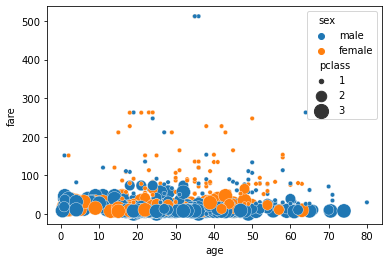

In [13]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex', size='pclass', sizes=(20,200))

### Line Plots
Line plots are used to analyze the changes in one variable with respect to other variable such as time. An example, say you want to see the daily changes in revenues everyday.
Data visualization is an art. We will see more visualization types but always, there is no viz type that is going to be fit all. It is always good to consider the audience and the goal of the analysis.
To make line plot in Seaborn, we will use sns.relplot() , the kind parameter being line . You can make a scatter plots by changing the kind to scatter .


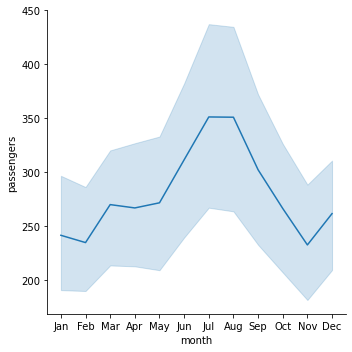

In [14]:
sns.relplot(data=flights, x='month', y='passengers', kind='line')

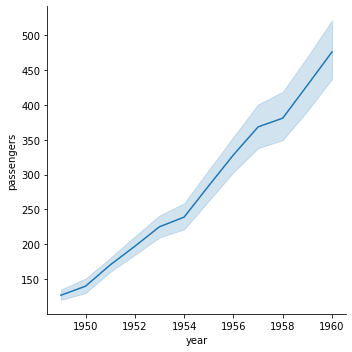

In [15]:
sns.relplot(data=flights, x='year', y='passengers', kind='line')

#### You can remove the confidence intervals by setting parameter ci=None . Setting ci=sd will instead show standard deviation and that can be useful sometime.


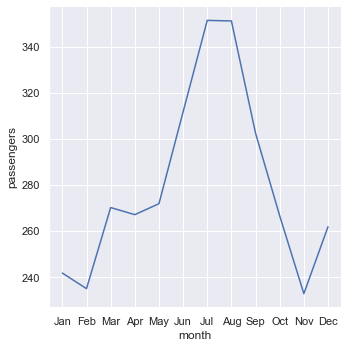

In [16]:
sns.set_theme(style="darkgrid") #setting the grid for all next plots
sns.relplot(data=flights, x='month', y='passengers', ci=None, kind='line')

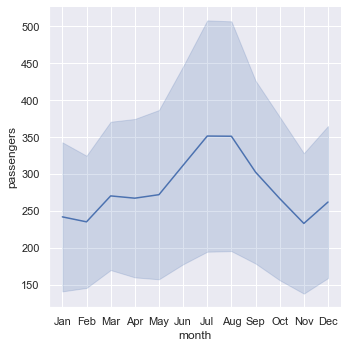

In [17]:
sns.relplot(data=flights, x='month', y='passengers', ci='sd', kind='line')

#### By default, relplot will aggregate the values on y axis in accordance to x axis. You can get rid of it by settng estimator=None .

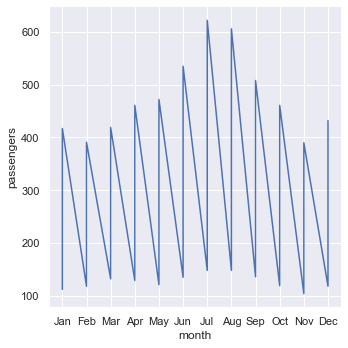

In [18]:
sns.relplot(data=flights, x='month', y='passengers', ci=None, estimator=None, kind='line')

### You can add multiple lines....

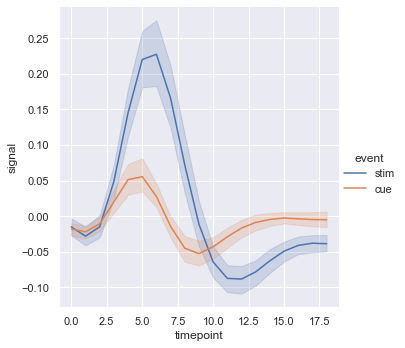

In [19]:
 sns.relplot(data=fmri, x='timepoint', y='signal', hue='event', kind='line')

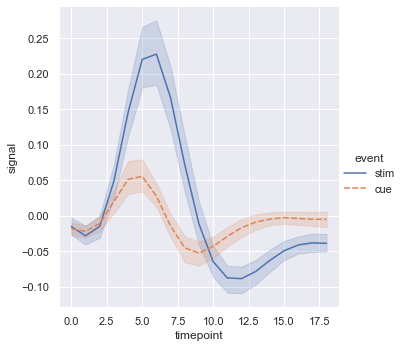

In [20]:
 sns.relplot(data=fmri, x='timepoint', y='signal',
             hue='event', kind='line', style='event')

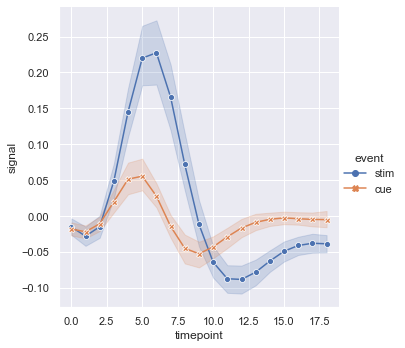

In [21]:
 sns.relplot(data=fmri, x='timepoint', y='signal', hue='event', kind='line', 
             style='event', dashes=False, markers=True)
    

### Showing multiple relationships

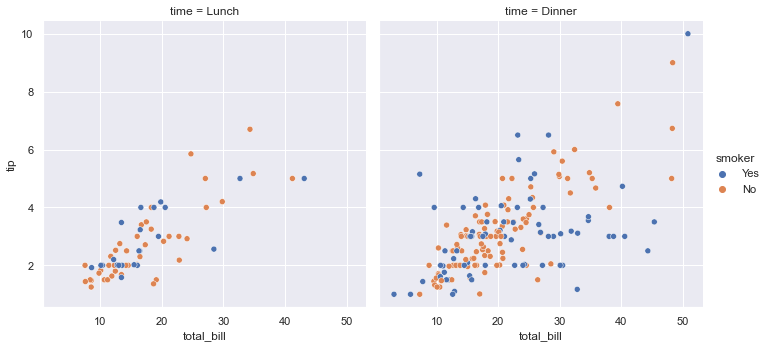

In [22]:
 sns.relplot(x='total_bill', y='tip', hue='smoker', col='time', data=tips);

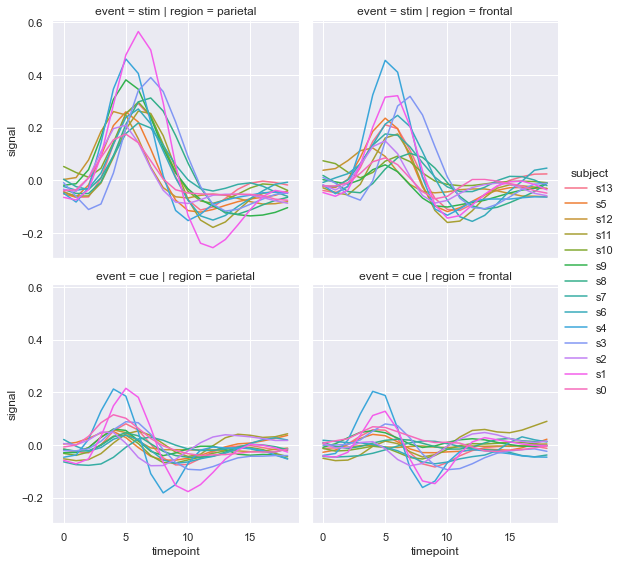

In [23]:
sns.relplot(x='timepoint', y='signal', hue='subject',
             col='region', row='event', height=4,
             kind='line', estimator=None, data=fmri)

### 2. Distribution Plots
###### These kind of plots are used to visualize the distribution of the features. Understanding how your data is distributed can help you to determine the range of values, their central tendency, or if they maybe inclined in one direction and also spotting outliers.
Distribution plots functions:
- displot() 
- jointplot() 
- pairplot() 
- rugplot()
- kdeplot

### Plotting Histograms with displot() and histplot()

#### Histogram is a bar plot whose x-axis is a variable or a feature and y-axis being the count of values of that particular variable. By default, displot() plots the histogram.


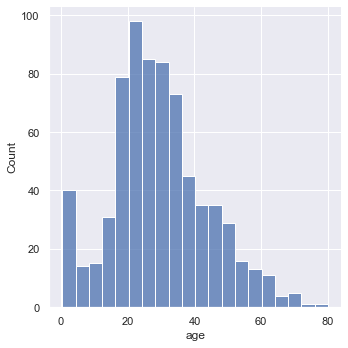

In [24]:
sns.displot(titanic['age'])

#### By default, Kernel Density Estimator(KDE) is True. By setting it off, we should remain with the histograms. 
##### A histogram displays data by grouping data into bins . We can set the bins to a value of choice.

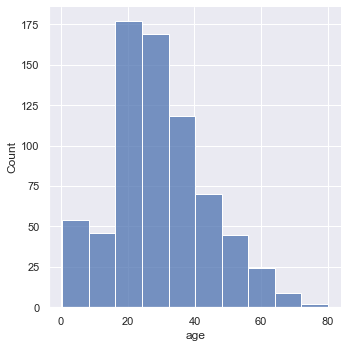

In [25]:
sns.displot(titanic['age'], kde=False, bins=10)

#### We can also plot categorical data on histograms.


<AxesSubplot:xlabel='day', ylabel='Count'>

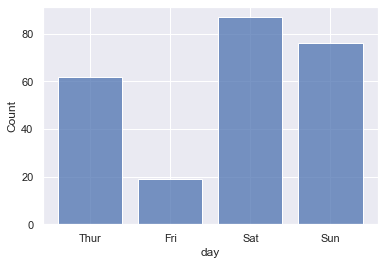

In [26]:
sns.histplot(tips, x='day', shrink=.8)

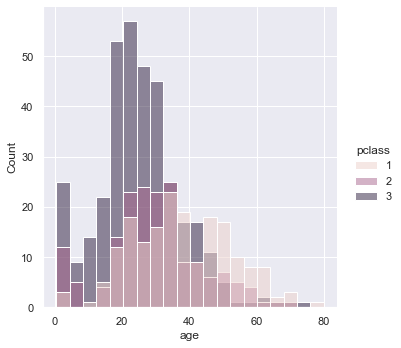

In [27]:
sns.displot(titanic, x='age',hue='pclass')

<AxesSubplot:xlabel='age', ylabel='Count'>

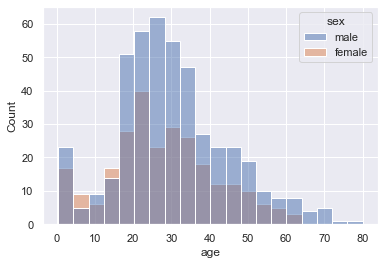

In [28]:
sns.histplot(titanic, x="age",hue="sex")

<AxesSubplot:xlabel='age', ylabel='Count'>

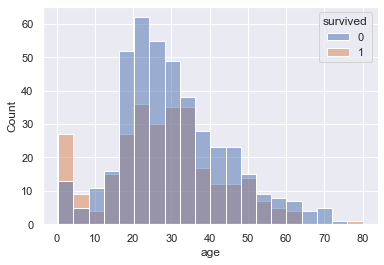

In [29]:
sns.histplot(titanic, x="age",hue="survived")

### We can also make stacked bars by setting the parameter multiple='stack' .

<AxesSubplot:xlabel='age', ylabel='Count'>

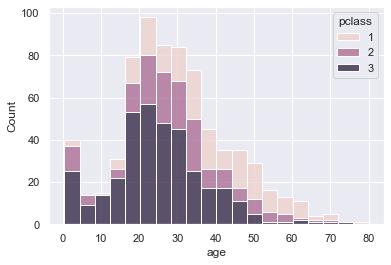

In [30]:
sns.histplot(titanic, x='age',hue='pclass', multiple='stack')

## Plotting Bivariate Data with Jointplot()


### We use jointplot() to plot two variables with bivariate and univariate graphs.
#### We can have the following options in kind : scatter, reg, resid, kde, hex . The default kind is scatter .

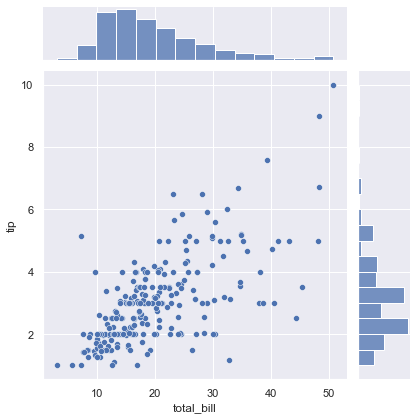

In [31]:
sns.jointplot(data=tips, x='total_bill', y='tip')

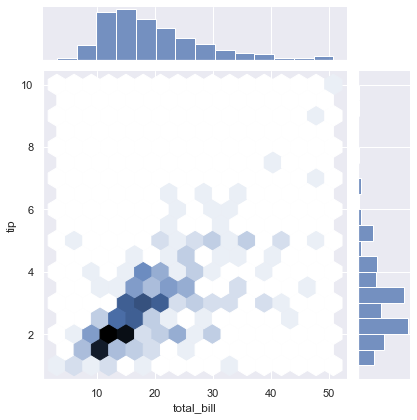

In [32]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex')

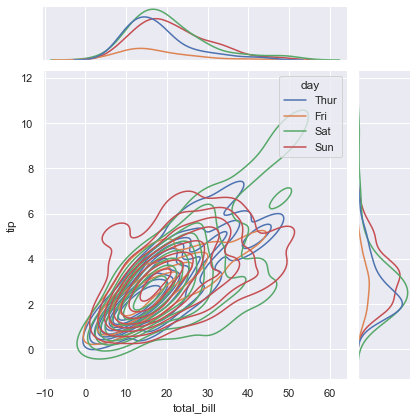

In [33]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='kde', hue='day')

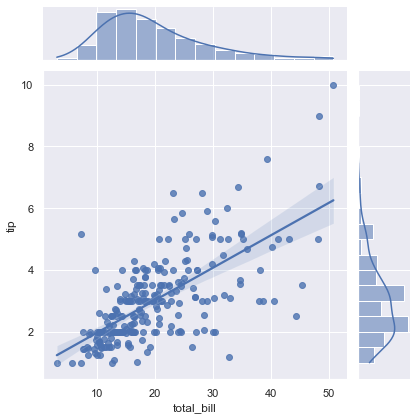

In [34]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg')

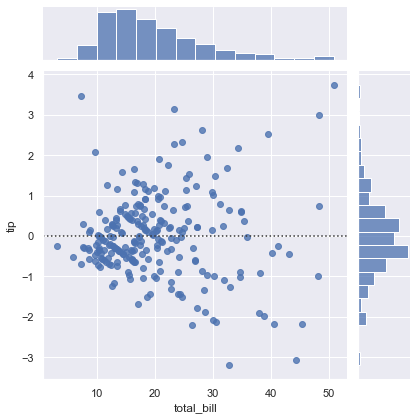

In [35]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='resid')

### Plotting Many Distribution with pairplot()

#### pairplot() visualize all possible distributions of variables in datasets. 
##### This is a cool plot, you can immmediately see relationships between features.

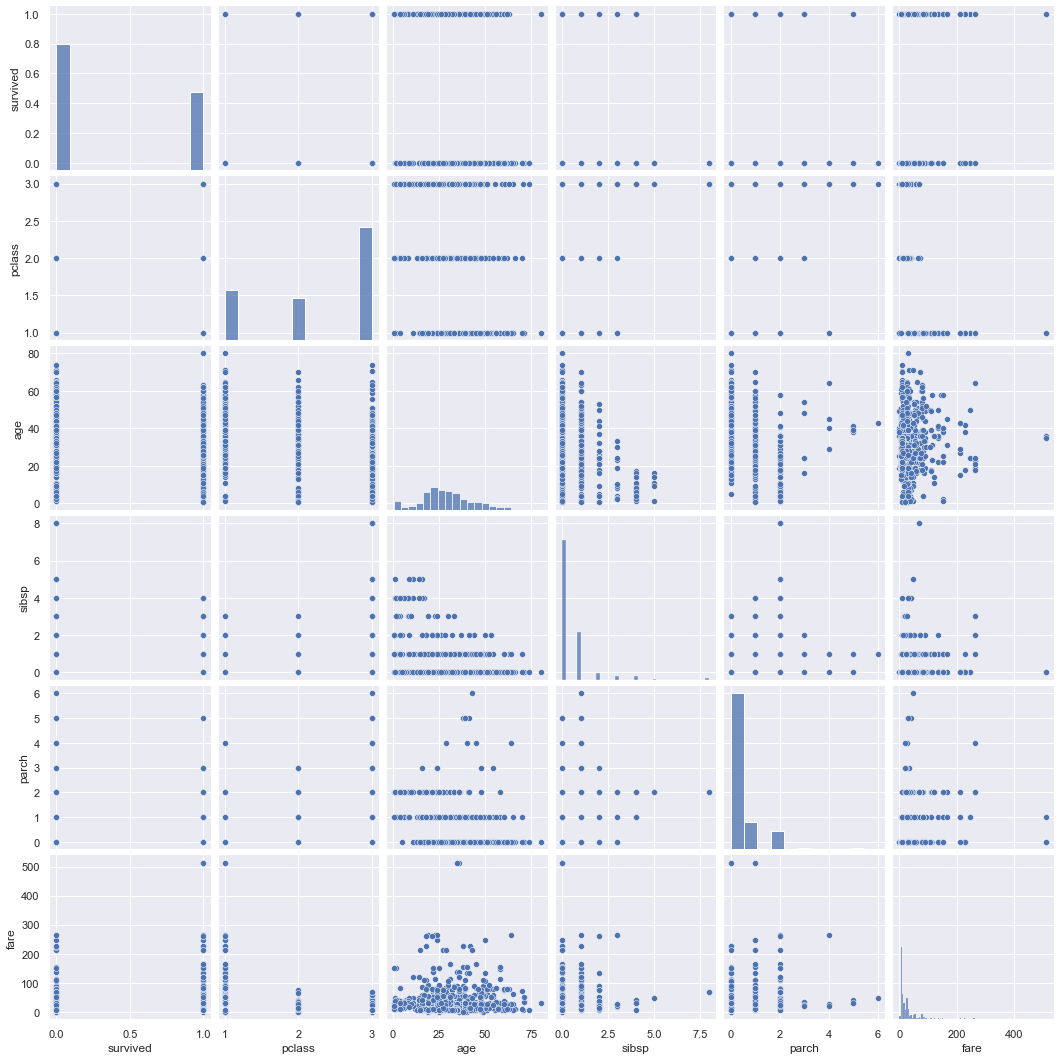

In [36]:
sns.pairplot(titanic.select_dtypes(exclude='bool'))

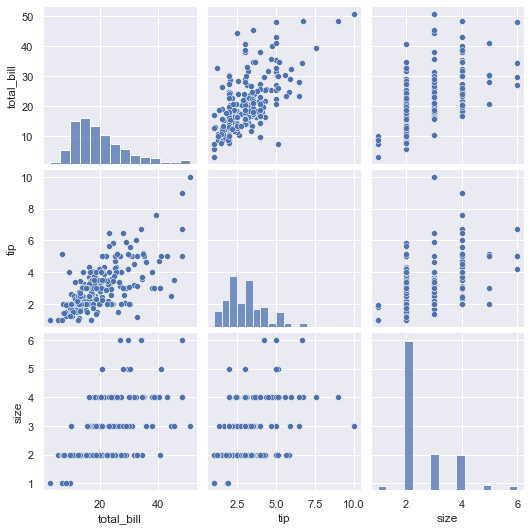

In [37]:
sns.pairplot(tips)

## Plotting Distributions with rugplot()
#### rugplot() plot marginal distributions by drawing ticks or dash along the x and y axis of the univariate variable.

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

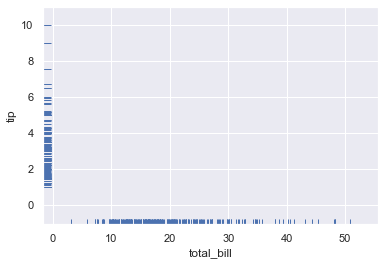

In [38]:
sns.rugplot(data=tips, x='total_bill', y='tip')

### Combining relplot() and rugplot in one figure...

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

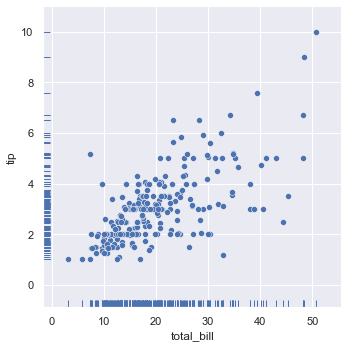

In [39]:
sns.relplot(data=tips, x='total_bill', y='tip') 
sns.rugplot(data=tips, x='total_bill', y='tip')

### Kernel Density Estimation (KDE) Plot with kdeplot() and displot()
##### We can visualize the probability density of a variable. Different to histogram which shows the counts, 
##### KDE plot smooths the visualization with a Guassian kernel.


<AxesSubplot:xlabel='tip', ylabel='Density'>

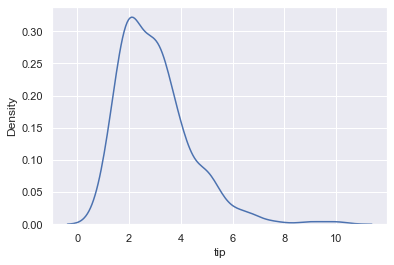

In [40]:
sns.kdeplot(data=tips, x='tip')

<AxesSubplot:xlabel='tip', ylabel='Density'>

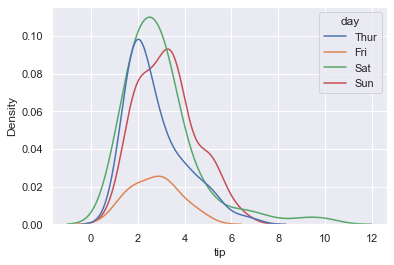

In [41]:
sns.kdeplot(data=tips, x='tip', hue='day')

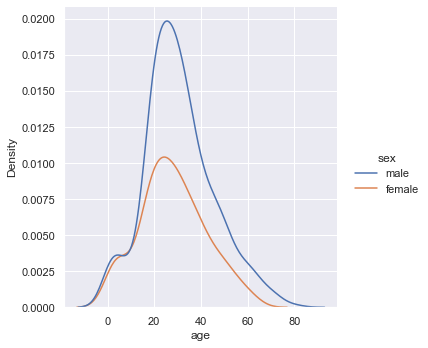

In [42]:
sns.displot(titanic,x='age', kind='kde', hue='sex')

<AxesSubplot:xlabel='tip', ylabel='Density'>

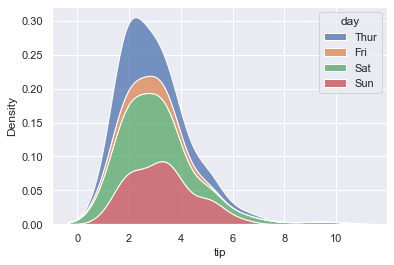

In [43]:
sns.kdeplot(data=tips, x='tip', hue='day', multiple='stack')

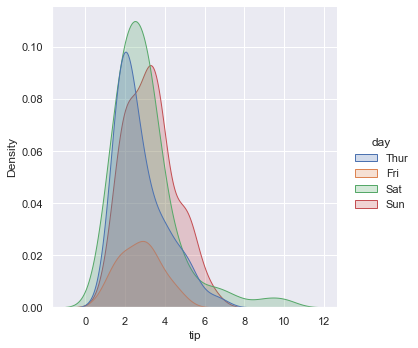

In [44]:
sns.displot(data=tips, x='tip', hue='day', kind='kde', fill=True)

#### Whether you use displot() or kdeplot() , you can see they are very handy in visualizing the density distributions.

#### Cumulative Distributions

### ecdf stands for empirical cumulative distribution function

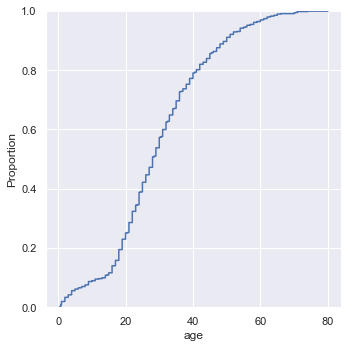

In [45]:
sns.displot(titanic, x='age', kind='ecdf')

## 3. Categorical Plots


### Categorical plots are used to visualize the categorical data.
### In Seaborn, there are various plot functions that we are going to see:

1. Categorical estimate plots
- barplot() 
- countplot() 
- pointplot()

1. Categorical distribution plots
- boxplot() 
- boxenplot() 
- violinplot1. 

### Categorical scatter plots

- stripplot() 
- swarmplot()

#### Just like we saw in distribution plots, Seaborn also provides a high level function catplot() to plot all these types above. You just have to pass the kind parameter. In order of what how they are listed above, here is the kind parameter: bar, count, point, box, boxen, violin, strip, swarm .

##### We will use both the high level function catplot and the specific categorical function along the way.

## Categorical estimate plots

### Barplot() 

Barplot is used to visualize the aggregated categorical data based on different estimation functions (mean being the default. We can either use barplot() or catplot(...,kind='bar) .

### and Countplot()

Countplot is used to visualize the number of observations in each category. It's like histogram for categorical data.











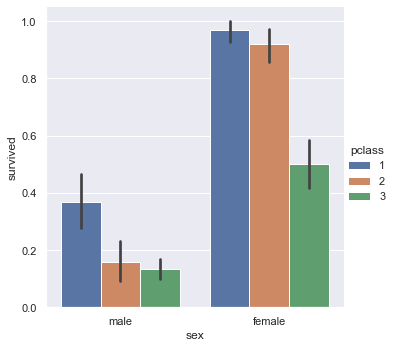

In [46]:
sns.catplot(data=titanic, x='sex', y='survived', hue='pclass', kind='bar')

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

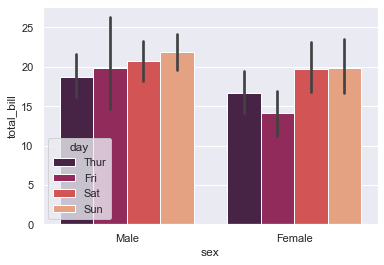

In [47]:
sns.barplot(data=tips, x='sex', y='total_bill', palette='rocket', hue='day')

<AxesSubplot:xlabel='day', ylabel='count'>

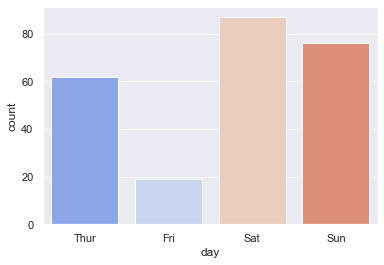

In [48]:
 sns.countplot(data=tips, x='day', palette='coolwarm')
#sns.catplot(data=tips, x='day', kind='count', palette='coolwarm') will do the same

### pointplot()
Rather than plotting bars, pointplot() plots the point estimation of the categorical data. 
You may also notice that it connects the points with the categorical variable specified at hue .

<AxesSubplot:xlabel='sex', ylabel='survived'>

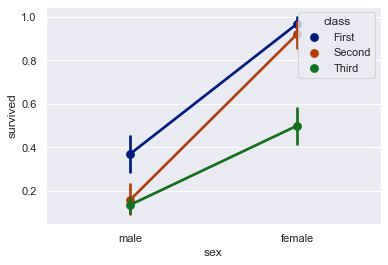

In [49]:
sns.pointplot(data=titanic, x='sex', y='survived', hue='class', palette='dark')

#### Categorical distribution plots boxplot() and boxenplot(), violinplot()
#### Both Box, boxen, and violin plots are used to plot the distributions of the categorical data.
`"A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be `“outliers”` using a method that is a function of the inter-quartile range."`


<AxesSubplot:xlabel='day', ylabel='total_bill'>

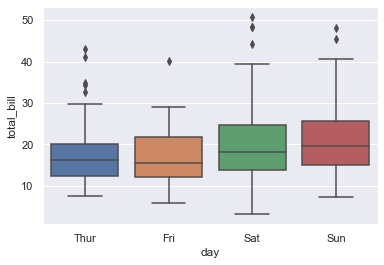

In [50]:
sns.boxplot(data=tips, x='day', y='total_bill')

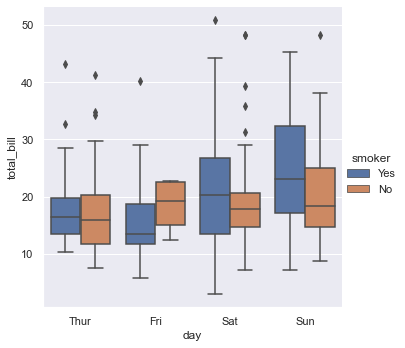

In [51]:
sns.catplot(data=tips, x='day', y='total_bill', hue='smoker', kind='box')

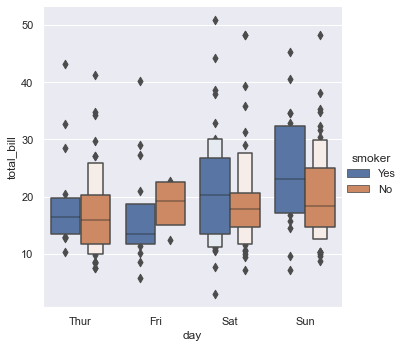

In [52]:
sns.catplot(data=tips, x='day', y='total_bill', hue='smoker', kind='boxen')

### Violin plot shows the distributions of the categorical data but features the kernel density of the underlyining estimation.


<AxesSubplot:xlabel='day', ylabel='total_bill'>

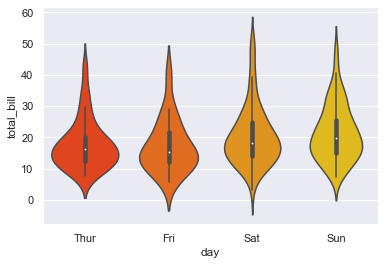

In [53]:
sns.violinplot(data=tips, x='day', y='total_bill', palette='autumn')

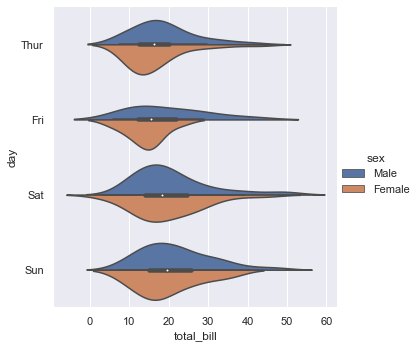

In [54]:
 # split parameter save space when hue have two levels
sns.catplot(data=tips, x='total_bill', y='day', hue='sex', kind='violin', split=True)

#### Categorical scatter plots stripplot() and swarmplot()
##### These types of plots make it easy to show the categorical data with scatter plots.

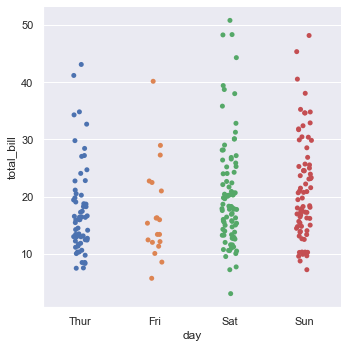

In [55]:
 # strip is the default kind paremeter when using catplot()
sns.catplot(data=tips, x='day', y='total_bill')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

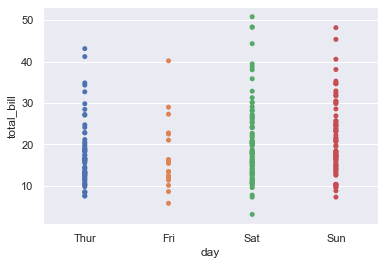

In [56]:
sns.stripplot(data=tips, x='day', y='total_bill', jitter=False)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

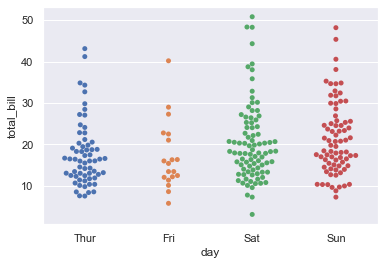

In [57]:
sns.swarmplot(data=tips, x='day', y='total_bill')

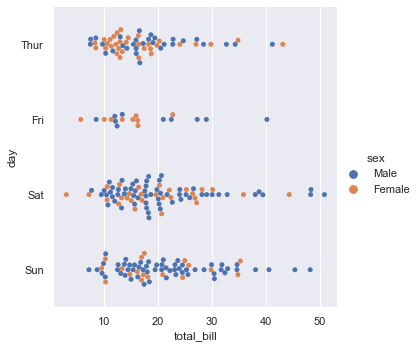

In [58]:
sns.catplot(data=tips, x='total_bill', y='day', hue='sex', kind='swarm')

### Plotting Multiple Categorical plots


Using Facetgrid (Multi-plot grid for plotting conditional relationships), 
we can plot multiple plots with catplot(....)

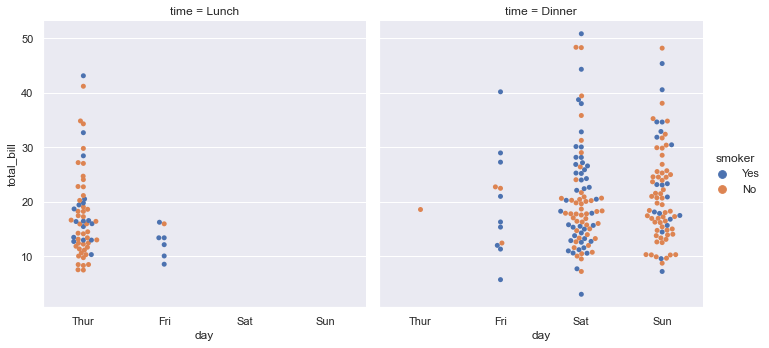

In [59]:
sns.catplot(data=tips, x='day', y='total_bill', hue='smoker', col='time', kind='swarm')

### Plotting Multiple Categorical plots


#### Using Facetgrid (Multi-plot grid for plotting conditional relationships), 
##### we can plot multiple plots with catplot(....)

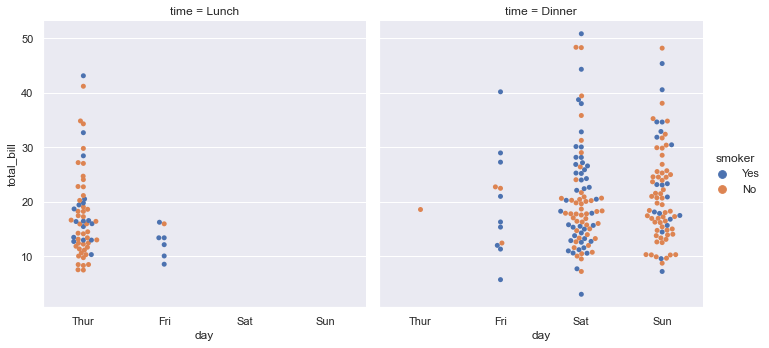

In [60]:
sns.catplot(data=tips, x='day', y='total_bill', hue='smoker', col='time', kind='swarm')

That's it for categorical plots.


#### 4. Regression Plots
#### Seaborn takes data visualizations to other extents: Not only you can plot features, but you can also plot the linear relationship between two variables (linear model).
##### Even if regplot() can be used for such goal, we will use lmplot()

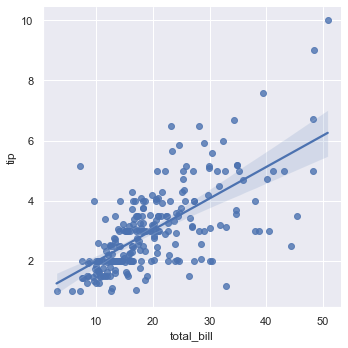

In [61]:
sns.lmplot(data=tips, x='total_bill', y='tip')

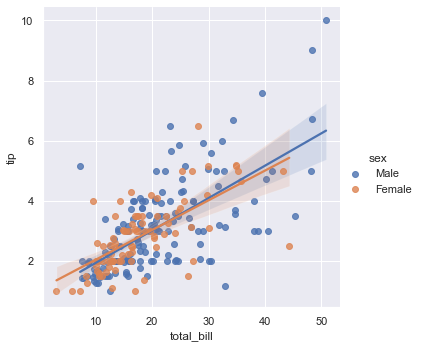

In [62]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex')

In [63]:
tips['big_tip'] = (tips.tip / tips.total_bill) >.15
tips.head()

,total_bill,tip,sex,smoker,day,time,size,big_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False


##### If we have one binary variable, we can also do logistic regression.


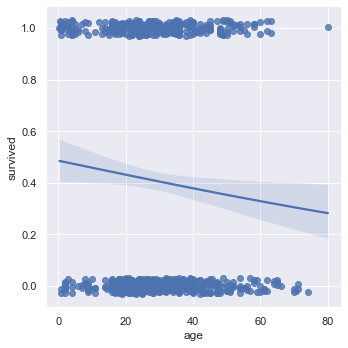

In [64]:
sns.lmplot(x='age', y='survived', data=titanic, logistic=True, y_jitter=0.03)

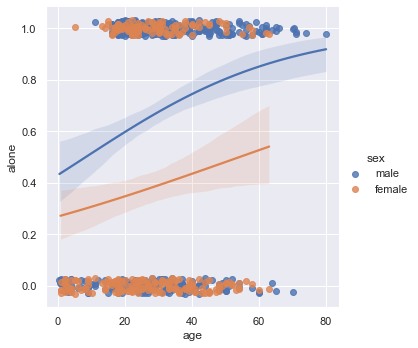

In [65]:
sns.lmplot(x='age', y='alone', data=titanic, logistic=True, y_jitter=0.03, hue='sex')

### We can also use markers to make plot more clear

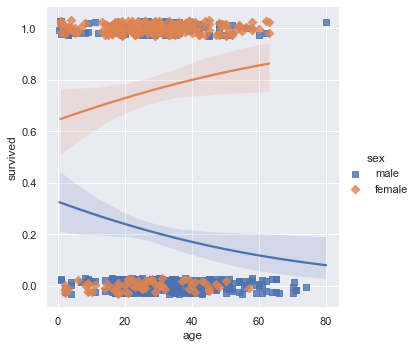

In [66]:
 sns.lmplot(x='age', y='survived', data=titanic, hue='sex', logistic=True,
            y_jitter=0.03, markers=['s','D'])
    

#### Multiple Plots
###### Like we did before, we can make multiple plots by providing another variable to col and row .

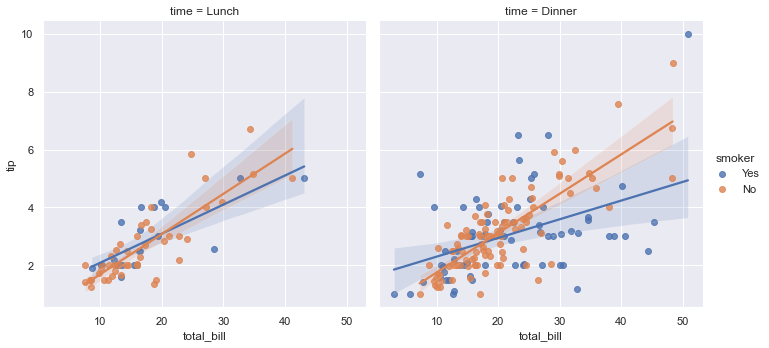

In [67]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker', col='time')

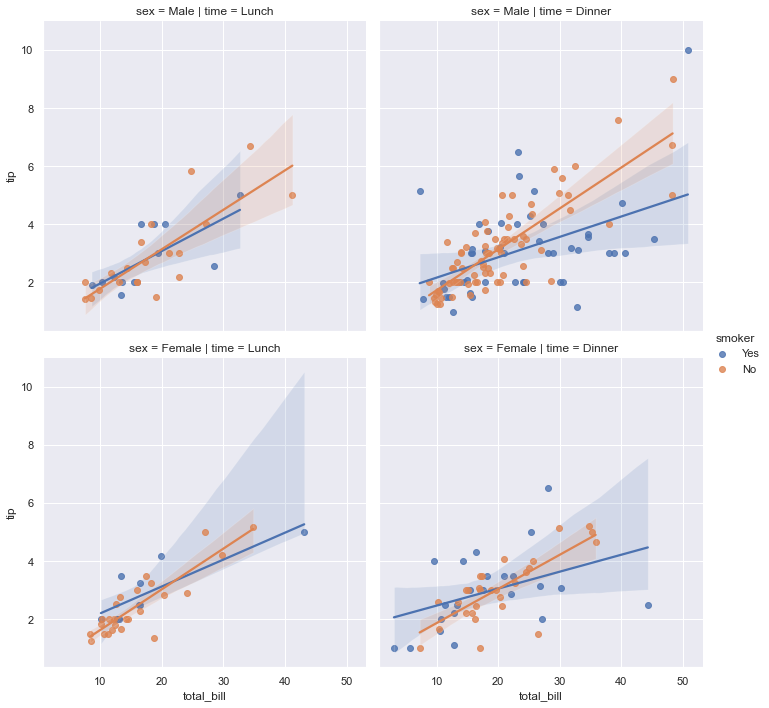

In [68]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker', col='time', row='sex')

##### One last thing about regression plot in Seaborn: 
##### We can also use jointplot() and pairplot() where we use reg in parameter kind .

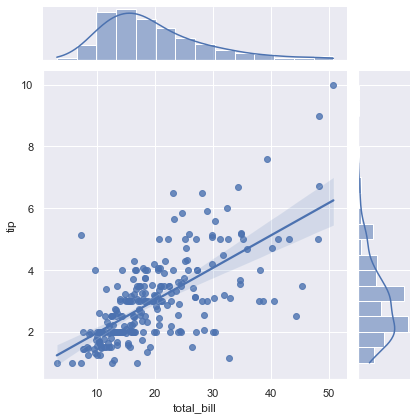

In [69]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg')

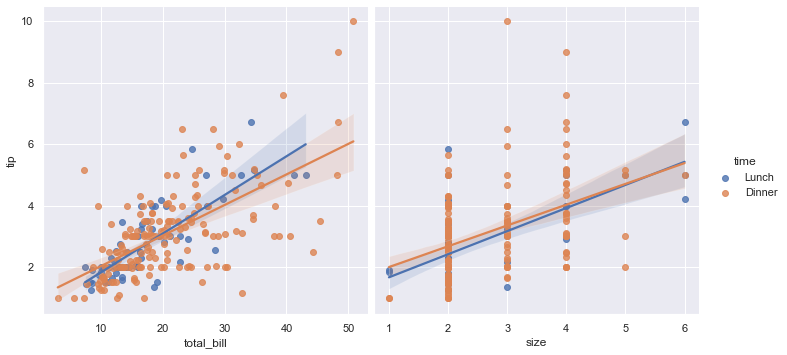

In [70]:
 sns.pairplot(tips, x_vars=['total_bill', 'size'], y_vars=['tip'], 
              hue='time', kind='reg', height=5)

### That's it for regression plots!!


## 5. Multiplots

#### Multiple plots functions are used to visualize multiple features on multiple axes.
- Facet Grid 

- Grid Pair

- Pair Plot

We have already plotted multiple features in previous sections but this section is going to be these grid plots.


## FacetGrid()
### FacetGrid() is used to create multiple grid plots.
- It allows us to plot the variables on row and column axes, 
- and we can also use hue parameter to make the visual more clear based off a given feature.
#### What's interesting about FacetGrid is that you can choose whether you plot on row axe, column axe or both.
- sns.FaceGrid() only create grids. In order to add visualizations, we will need to map it to a given plot type (scatter, histogram, bar....).

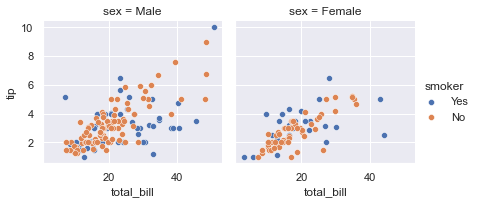

In [71]:
plot = sns.FacetGrid(tips, col='sex', hue='smoker') 
plot.map(sns.scatterplot,'total_bill', 'tip') 
plot.add_legend()

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


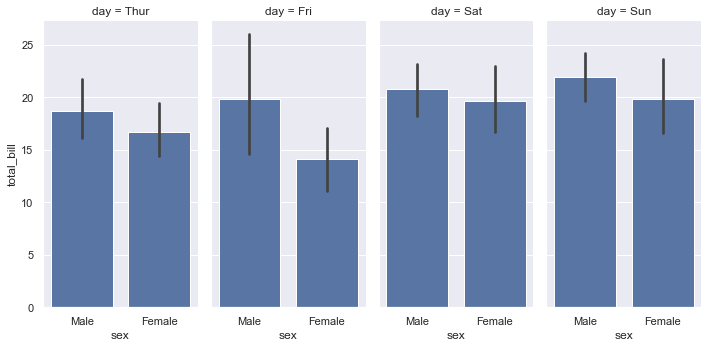

In [72]:
plot = sns.FacetGrid(tips, col='day', height=5, aspect=.5)
plot.map(sns.barplot, 'sex', 'total_bill');

### PairGrid()
- We can use pair grid to get the higher level overview of the dataset. 
- It will plot the pairwise relationship in the dataset.
- As you are going to see, it is much easier to use than FacetGrid.


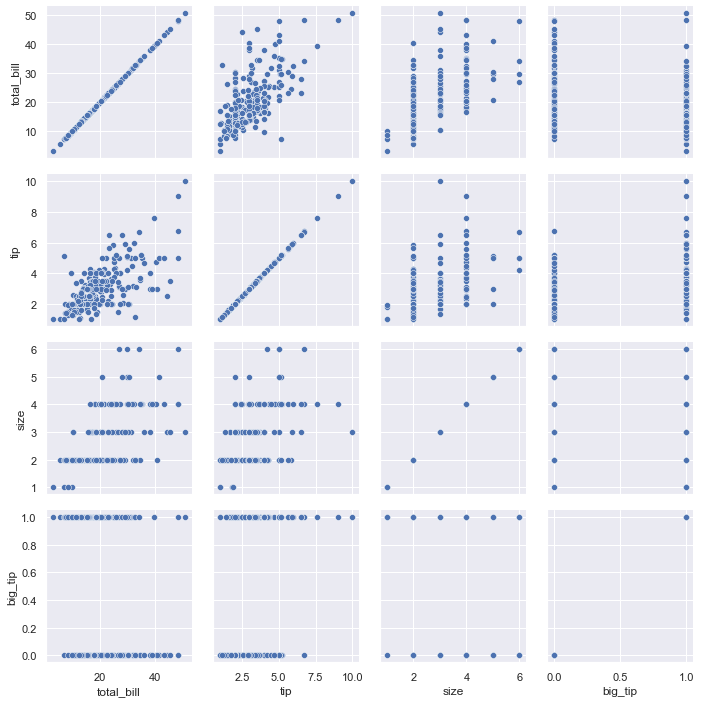

In [73]:
plot = sns.PairGrid(tips) 
plot.map(sns.scatterplot)

#### It is also possible to be selective on the plot type you want at the diagonals.

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

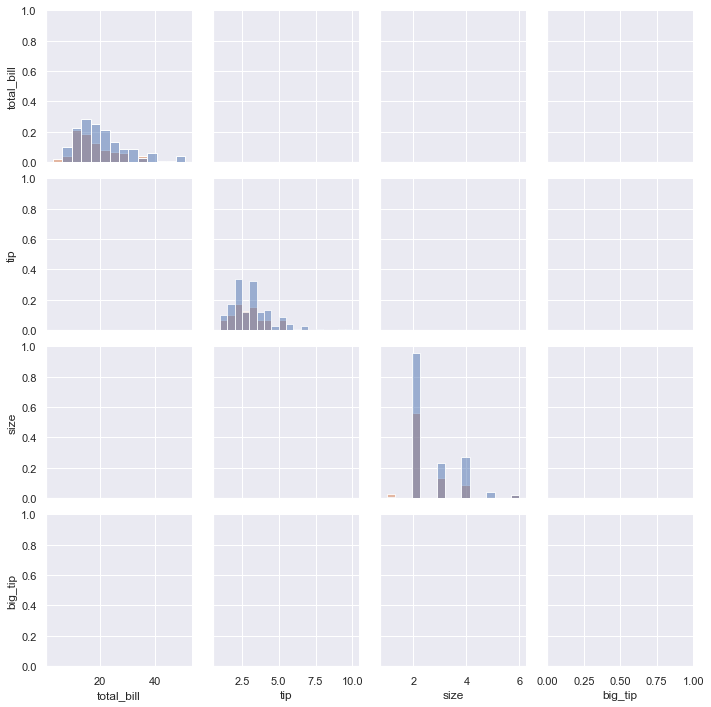

In [74]:
plot = sns.PairGrid(tips, hue='sex')
plot.map_diag(sns.histplot)
plot.map_offdiag(sns.scatterplot) 
plot.add_legend()

In [ ]:
plot = sns.PairGrid(tips) 
plot.map_diag(sns.histplot)
plot.map_upper(sns.scatterplot)
plot.map_lower(sns.kdeplot)
plot.add_legend()

In [ ]:
plot = sns.PairGrid(tips) 
plot.map_diag(sns.histplot) 
plot.map_upper(sns.scatterplot) 
plot.map_lower(sns.kdeplot) 
plot.add_legend()

## missing graphs here move to plot 6. show mr emeka

# 6. Matrix Plots: Heat Maps and Cluster Maps

### In data analysis, sometime it is handy to visualize the data as color encoded matrices and can be used to find the clusters within the data.

### Heat Maps
#### heatmap() will color the matrix.
Let's first see it for a numpy array and we will apply it to a real world dataset.


In [ ]:
sns.set_theme()
data = np.random.randn(10,15)
sns.heatmap(data)

In [ ]:
titanic.head()

In [ ]:
 # Finding the correlation of features in titanic dataset
correlation = titanic.corr()
correlation

In [ ]:
sns.heatmap(correlation)

#### If you want to add the values in addition to color, you can set the parameter annot to True .

In [ ]:
sns.heatmap(correlation, annot=True)

### Cluster Maps

## clustermap will plot the clustered heatmap.


In [ ]:
sns.clustermap(correlation)

### So far, you have saw how flexible Seaborn is in visualizing data with different kinds of plots.
##### By default, the Seaborn plots are clear and good looking. But there are times you are going to need more attractive visualizations and that is what is coming up.


### Styles and Themes
 
##### There are five styles in Seaborn: darkgrid(default), whitegrid, dark, white, and ticks.

In [ ]:
sns.set_style('whitegrid')
sns.catplot(data=tips, x='day', y='total_bill', kind='bar')

In [ ]:
sns.set_style('dark')
sns.catplot(data=tips, x='day', y='total_bill', kind='box')

## Removing the Axes Spines

#### We can also use despine() to remove the top and right axes spines.

We can also move the spines away from the data by setting the offset distance or points that spines should move away from the axes.

In [ ]:
sns.catplot(data=tips, x='day', y='total_bill', kind='box') 
sns.despine()

#### We can also move the spines away from the data by setting the offset distance or points that spines should move away from the axes.



In [ ]:
sns.catplot(data=tips, x='day', y='total_bill', kind='violin')
sns.despine(offset=10, trim=True)

## Size and Aspect

We can use Matplotlib figsize function to change the size of Seaborn plots.


In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data=tips, x='total_bill', hue='sex')

#### You can also set the size of the plot by using parameters size and aspect but they do not work in all plots.
#### Scaling plot elements with the context

### Context is used to control the scale of the elements of the plot. 
#### This can be really helpful depending on where you want to use the visualizations.
#### We use sns.set_context() to achieve that. 
#### There are four contexts: paper, notebook(default), talk, and poster .
#### But we also have to reset the style first.

In [ ]:
sns.set_theme()

In [ ]:
sns.set_context('paper') 
sns.kdeplot(data=tips, x='tip', hue='day')

In [ ]:
sns.set_context('talk') 
sns.kdeplot(data=tips, x='tip', hue='day')

In [ ]:
sns.set_context('poster') 
sns.kdeplot(data=tips, x='tip', hue='day')

In [ ]:
sns.set_context('notebook') 
sns.kdeplot(data=tips, x='tip', hue='day')

### Colors
### Seaborn allows us to choose color that we think can make the visuals attractive.
### With whole range of color palettes, there are so many options to choose from.
### We can either use `sns.color_palette() before each plot, or set palette inside the plot definition.`

In [ ]:
sns.set_palette('rocket')
sns.kdeplot(data=tips, x='tip', hue='day', multiple='stack')

In [ ]:
sns.set_palette('viridis')
sns.kdeplot(data=tips, x='tip', hue='day', multiple='stack')

In [ ]:
sns.kdeplot(data=tips, x='tip', hue='day', multiple='stack', palette='icefire')

To see the available color palettes, check out `the documentation or this cheat sheet.`

In [ ]:
sns.color_palette('tab10')

In [ ]:
sns.color_palette('dark')

### Lastly, you can use` sns.set_theme() to directly set the style, palette, and context.`

In [ ]:
sns.set_theme(style='white', context='talk', palette='viridis') 
sns.kdeplot(data=tips, x='tip', hue='day', multiple='stack')

### This is the end of the lab!!
